In [94]:
import torch
import torchvision
import torchvision.transforms as transforms
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd 
import imageio
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy.ndimage as ndi

In [47]:
import os
print(os.listdir("./coronahack-chest-xraydataset/"))
print(os.listdir("./coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/"))

['.DS_Store', 'Coronahack-Chest-XRay-Dataset', 'Chest_xray_Corona_Metadata.csv', 'Chest_xray_Corona_dataset_Summary.csv']
['.DS_Store', 'test', 'train']


In [22]:
print(os.listdir("./kaggle/corona_check/train/Normal"))
print(os.listdir("./kaggle/corona_check/test/Normal"))

[]
[]


In [55]:
!cd ./kaggle/corona_check/train/
!rm ./kaggle/corona_check/train/*.jpeg

!cd ./kaggle/corona_check/test/
!rm ./kaggle/corona_check/test/*.jpeg

rm: ./kaggle/corona_check/train/*.jpeg: No such file or directory
rm: ./kaggle/corona_check/test/*.jpeg: No such file or directory


In [53]:
import shutil, sys
def copy_img(src_path,dst_path):
    try:
        shutil.copy(src_path, dst_path)
        stmt ='File Copied'
    #except IOError as e:
    #    print('Unable to copy file {} to {}'
    #          .format(src_path, dst_path))
    #    stmt ='Copy Failed - IO Error'
    except:
        print('When try copy file {} to {}, unexpected error: {}'
              .format(src_path, dst_path, sys.exc_info()))
        stmt ='Copy Failed - other Error'+ sys.exc_info()
        
    return stmt 

In [26]:
data_dir="./coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/"
metadata_path="./coronahack-chest-xraydataset/"

In [27]:
train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'test')

In [28]:
meta_data = pd.read_csv(metadata_path+'Chest_xray_Corona_Metadata.csv')
meta_data.head()

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
0,0,IM-0128-0001.jpeg,Normal,TRAIN,NaN,NaN
1,1,IM-0127-0001.jpeg,Normal,TRAIN,NaN,NaN
2,2,IM-0125-0001.jpeg,Normal,TRAIN,NaN,NaN
3,3,IM-0122-0001.jpeg,Normal,TRAIN,NaN,NaN
4,4,IM-0119-0001.jpeg,Normal,TRAIN,NaN,NaN


In [29]:
meta_data['File_path']=''
meta_data.loc[meta_data['Dataset_type']=='TRAIN','File_path']=train_dir+'/'
meta_data.loc[meta_data['Dataset_type']=='TEST','File_path']=test_dir+'/'

In [30]:
meta_data['X_ray_img_nm_path']=meta_data['File_path']+meta_data['X_ray_image_name']

In [49]:
meta_data.head()

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category,File_path,X_ray_img_nm_path
0,0,IM-0128-0001.jpeg,Normal,TRAIN,NaN,NaN,./coronahack-chest-xraydataset/Coronahack-Ches...,./coronahack-chest-xraydataset/Coronahack-Ches...
1,1,IM-0127-0001.jpeg,Normal,TRAIN,NaN,NaN,./coronahack-chest-xraydataset/Coronahack-Ches...,./coronahack-chest-xraydataset/Coronahack-Ches...
2,2,IM-0125-0001.jpeg,Normal,TRAIN,NaN,NaN,./coronahack-chest-xraydataset/Coronahack-Ches...,./coronahack-chest-xraydataset/Coronahack-Ches...
3,3,IM-0122-0001.jpeg,Normal,TRAIN,NaN,NaN,./coronahack-chest-xraydataset/Coronahack-Ches...,./coronahack-chest-xraydataset/Coronahack-Ches...
4,4,IM-0119-0001.jpeg,Normal,TRAIN,NaN,NaN,./coronahack-chest-xraydataset/Coronahack-Ches...,./coronahack-chest-xraydataset/Coronahack-Ches...


In [32]:
meta_COVID_19_train = meta_data[(meta_data['Dataset_type']=='TRAIN') & 
                        ((meta_data['Label']=='Normal')|(meta_data['Label']=='Pnemonia') & (meta_data['Label_2_Virus_category']=='COVID-19'))]


meta_COVID_19_test = meta_data[(meta_data['Dataset_type']=='TEST') & 
                        ((meta_data['Label']=='Normal')|(meta_data['Label']=='Pnemonia') & (meta_data['Label_2_Virus_category']=='COVID-19'))]


## Moving the 10 Corona Infected dataset to Test

meta_data_covid_test = meta_data[meta_data['Label_2_Virus_category']=='COVID-19'].sample(12)
meta_COVID_19_train = meta_COVID_19_train[~meta_COVID_19_train['X_ray_image_name'].isin(meta_data_covid_test['X_ray_image_name'])]
meta_COVID_19_test_fnl = pd.concat([meta_data_covid_test,meta_COVID_19_test],ignore_index=False)

In [33]:
meta_COVID_19_train.loc[meta_COVID_19_train['Label'] =='Pnemonia','Label']='COVID19'
meta_COVID_19_test_fnl.loc[meta_COVID_19_test_fnl['Label'] =='Pnemonia','Label']='COVID19'

In [34]:
print("===============Train Set==========================\n")
print(meta_COVID_19_train.groupby(['Label']).agg({'Dataset_type':'count'}))

print("\n===============Test Set==========================\n")
print(meta_COVID_19_test_fnl.groupby(['Label']).agg({'Dataset_type':'count'}))

===============Train Set==========================

         Dataset_type
Label                
COVID19            46
Normal           1342

===============Test Set==========================

         Dataset_type
Label                
COVID19            12
Normal            234


In [72]:
meta_COVID_19_train['Img_tgt_path']="./kaggle/corona_check/train/"
meta_COVID_19_test_fnl['Img_tgt_path']="./kaggle/corona_check/test/"

In [73]:
meta_COVID_19_train.loc[meta_COVID_19_train['Label']=='Normal','Img_tgt_path']=meta_COVID_19_train['Img_tgt_path']+'Normal/'
meta_COVID_19_train.loc[meta_COVID_19_train['Label']=='COVID19','Img_tgt_path']=meta_COVID_19_train['Img_tgt_path']+'COVID19/'

meta_COVID_19_test_fnl.loc[meta_COVID_19_test_fnl['Label']=='Normal','Img_tgt_path']=meta_COVID_19_test_fnl['Img_tgt_path']+'Normal/'
meta_COVID_19_test_fnl.loc[meta_COVID_19_test_fnl['Label']=='COVID19','Img_tgt_path']=meta_COVID_19_test_fnl['Img_tgt_path']+'COVID19/'

In [74]:
meta_COVID_19_train['Move_status'] = np.vectorize(copy_img)(meta_COVID_19_train['X_ray_img_nm_path'],meta_COVID_19_train['Img_tgt_path'])
meta_COVID_19_test_fnl['Move_status'] = np.vectorize(copy_img)(meta_COVID_19_test_fnl['X_ray_img_nm_path'],meta_COVID_19_test_fnl['Img_tgt_path'])

In [76]:
dirname = './kaggle/corona_check/'
train_path = os.path.join(dirname, 'train/')
train_nrml_pth = os.path.join(train_path, 'Normal/')
train_covid19_pth = os.path.join(train_path, 'COVID19/')

test_path = os.path.join(dirname, 'test/')
test_nrml_pth = os.path.join(train_path, 'Normal/')
test_covid19_pth = os.path.join(train_path, 'COVID19/')

In [77]:
def plot_imgs(item_dir, num_imgs=25):
    all_item_dirs = os.listdir(item_dir)
    item_files = [os.path.join(item_dir, file) for file in all_item_dirs][:num_imgs]

    plt.figure(figsize=(10, 10))
    for idx, img_path in enumerate(item_files):
        plt.subplot(5, 5, idx+1)

        img = plt.imread(img_path)
        plt.imshow(img)

    plt.tight_layout()


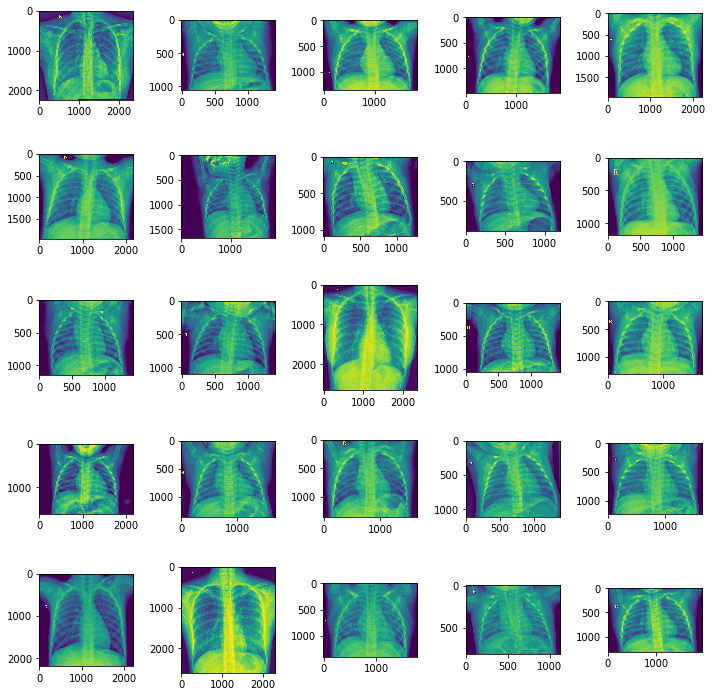

In [78]:
plot_imgs(train_nrml_pth)

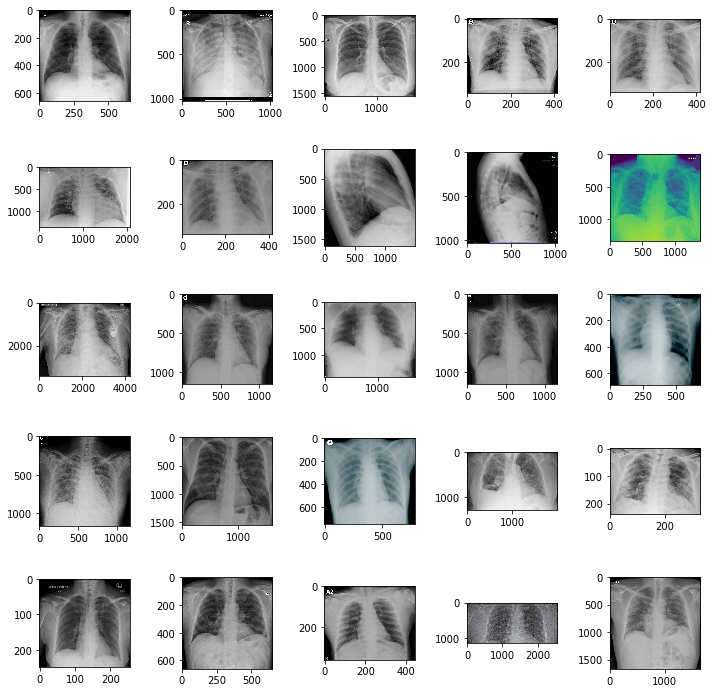

In [79]:
plot_imgs(train_covid19_pth)

In [84]:
def plot_img_hist(item_dir, num_img=6):
    all_item_dirs = os.listdir(item_dir)
    item_files = [os.path.join(item_dir, file) for file in all_item_dirs][:num_img]
  
    #plt.figure(figsize=(10, 10))
    for idx, img_path in enumerate(item_files):
        fig1 = plt.figure(idx,figsize=(10, 10))
        fig1.add_subplot(2, 2, 1)
        img = mpimg.imread(img_path, )
        plt.imshow(img)
        fig1.add_subplot(2, 2, 2)
        plt.hist(img.ravel(),bins=256, fc='k', ec='k')
  
    plt.tight_layout()

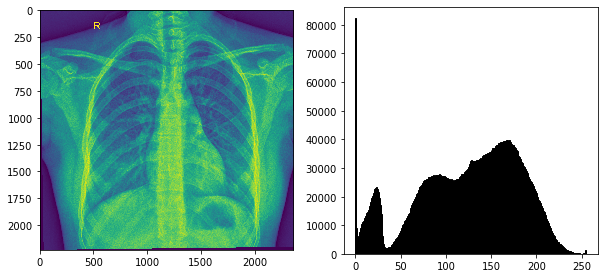

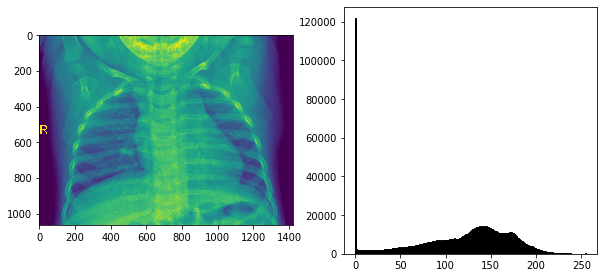

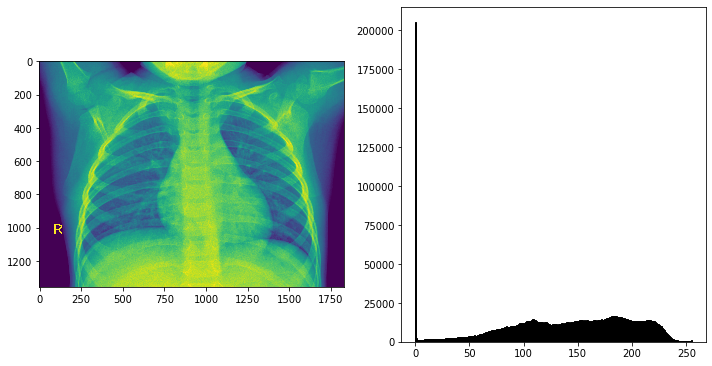

In [85]:
plot_img_hist(train_nrml_pth,3)

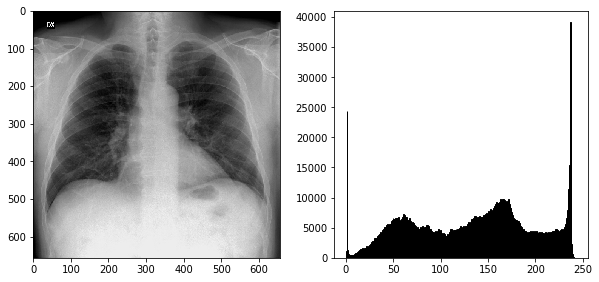

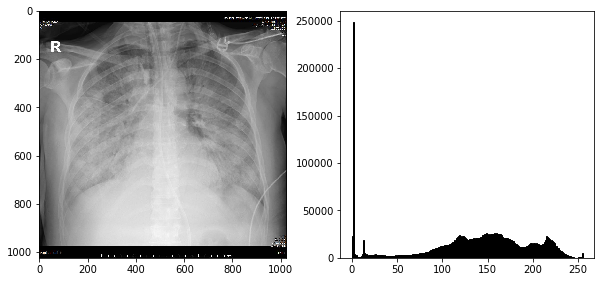

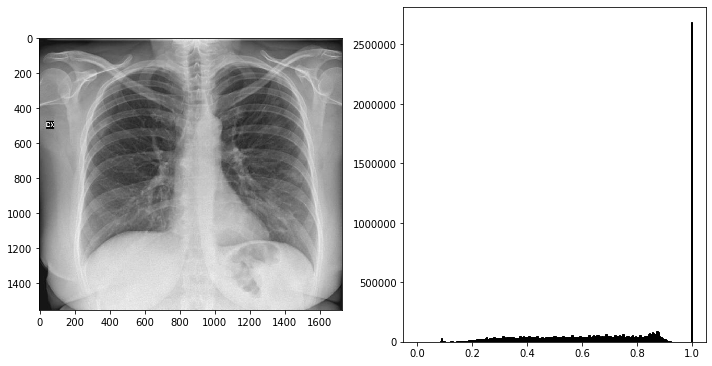

In [86]:
plot_img_hist(train_covid19_pth,3)

In [92]:
def plot_img_hist_ndi(item_dir, num_img=6):
    all_item_dirs = os.listdir(item_dir)
    item_files = [os.path.join(item_dir, file) for file in all_item_dirs][:num_img]
  
    #plt.figure(figsize=(10, 10))
    for idx, img_path in enumerate(item_files):
        im = imageio.imread(img_path)
        hist = ndi.histogram(im, min=0, max=255, bins=256)
        cdf = hist.cumsum() / hist.sum()
    
        fig1 = plt.figure(idx,figsize=(10, 10))
        fig1.add_subplot(2, 3, 1)
        img = mpimg.imread(img_path, )
        plt.title("No. {}".format(idx))
        plt.imshow(img)
        fig1.add_subplot(2, 3, 2)
        plt.title("Histogram")
        plt.plot(hist)
        fig1.add_subplot(2, 3, 3)
        plt.title("CDF")
        plt.plot(cdf)

    plt.tight_layout()

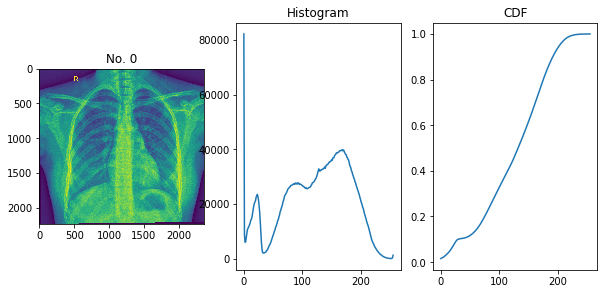

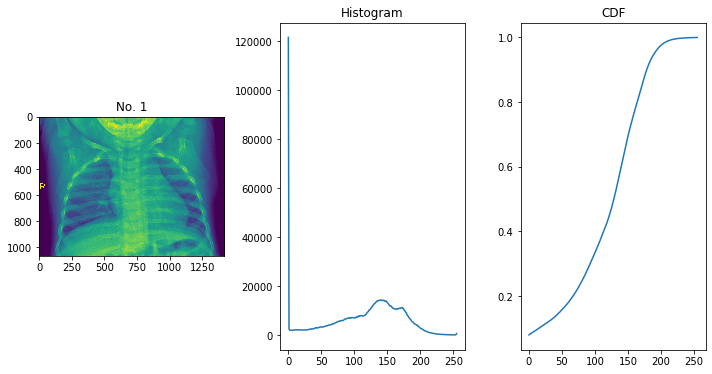

In [95]:
plot_img_hist_ndi(train_nrml_pth,2)

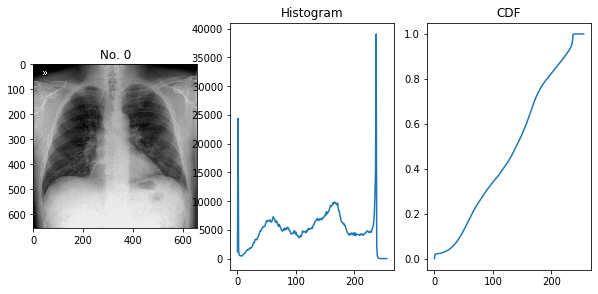

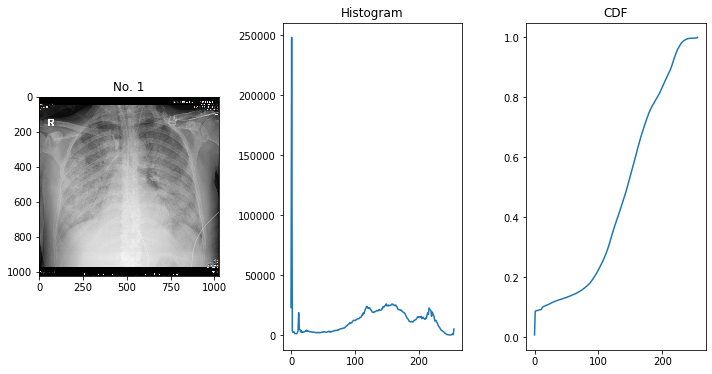

In [96]:
plot_img_hist_ndi(train_covid19_pth,2)

In [106]:
from tensorflow.python import keras
from keras.preprocessing.image import ImageDataGenerator
train_dir = r'./kaggle/corona_check/train/'
test_dir = r'./kaggle/corona_check/test/'

## Model Params

image_size = 150
batch_size = 50
nb_classes = 2

train_datagen = ImageDataGenerator(rescale = 1./255,     # Convert all pixels to 0-1
                              width_shift_range = 0.1,   # The magnitude of the horizontal shift of the picture when the data is improved
                              height_shift_range = 0.1,  # The magnitude of the vertical shift of the picture when the data is boosted
                              shear_range = 0.2,         # Set the shear strength
                              horizontal_flip = True,    # Randomly select half of the picture to flip horizontally
                              fill_mode ='nearest')      #The points that exceed the boundary will be processed according to the method given by this parameter.Generally, there are some  
                                                         # ‘constant’，‘nearest’，‘reflect’或‘wrap。

test_datagen = ImageDataGenerator(rescale = 1./255)

In [107]:
print(test_dir)

./kaggle/corona_check/test/


In [108]:
print("traning set: ")

# Generate batches of tensor image data through real-time data augmentation. Data will be continuously cycled (by batch)

train_datagen = train_datagen.flow_from_directory(train_dir,              # The path to the target directory. Each class should contain a subdirectory. Any PNG, JPG, BMP, PPM or TIF images in the subdirectory tree will be included in the raw
                                               (image_size, image_size),  # Integer tuple (height, width), default: (256, 256). All images will be resized 
                                               batch_size=batch_size,     # The size of the batch of data (default 32)
                                               class_mode='categorical')  # class_mode is one of categorical "," binary "," sparse "or None, which determines the array form of the returned tags. categorical returns 2D one-hot encoded tags.
print("testing set: ")

test_datagen = test_datagen.flow_from_directory(test_dir,
                                             (image_size,image_size),
                                              batch_size=batch_size,
                                              class_mode='categorical')


#Define step count

train_steps = train_datagen.samples//batch_size # "//" means integer division
test_steps = test_datagen.samples//batch_size

traning set: 
Found 1388 images belonging to 2 classes.
testing set: 
Found 246 images belonging to 2 classes.


In [119]:
# Neural Architecture (Could be project)

from keras import backend as K
from keras import layers
from keras.models import Model, Sequential

if K.image_data_format()=='channels_first':  # (‘channels_last’,‘channels_first’）
    input_shape =(3,image_size,image_size)
else:
    input_shape =(image_size,image_size,3)   

# The input feature is a tensor of 150x150x3, where 150x150 is used for image pixels and 3 is used for three color channels
img_input = layers.Input(shape=input_shape)

#
# The first convolution layer extracts the features of 3x3x32 (size of 2D convolution window: 3x3, output 32 dimensions),
#uses a linear rectification function (Rectified Linear Unit, ReLU), and then the largest pooling layer with a size of 2x2

x = layers.Conv2D(32,3,activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(64,3,activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(64,3,activation='relu')(x)
x = layers.MaxPooling2D(2)(x)


# Flatten the feature map into a one-dimensional data (`1-dim`) tensor to add a fully connected layer (dense)

x = layers.Flatten()(x)


# Use `sigmoid` activation function and 128 neurons to create a fully connected layer

x = layers.Dense(128,activation='sigmoid')(x)

# Randomly disconnect the input neural cloud with a certain probability to prevent overfitting
x = layers.Dropout(0.5)(x)                       


# Create output layer with 2 neurons and `softmax` activation function

output = layers.Dense(2,activation='softmax')(x)

model= Model(img_input,output)

model.summary()   

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 17, 17, 64)        0   

In [116]:
from keras.optimizers import Adam

# Define corresponding parameters for the model
model.compile(loss='categorical_crossentropy', # Multi-class logarithmic loss. Note that when using this objective function, labels need to be converted into binary sequences of the form (nb_samples, nb_classes).
              optimizer =Adam(lr=0.0001),
              metrics = ['acc'] )              # Metrics list metrics: For classification problems, we generally set the list to metrics = ['accuracy']


# Set the corresponding number of training iterations

epochs = 20


# Training model
history = model.fit_generator(train_datagen,
                             steps_per_epoch=train_steps,
                             epochs=epochs,
                             validation_data=test_datagen,
                             validation_steps=test_steps )   


Epoch 1/20
27/27 [==============================] - 62s 2s/step - loss: 0.0506 - acc: 0.9821 - val_loss: 0.1539 - val_acc: 0.9600
Epoch 2/20
27/27 [==============================] - 64s 2s/step - loss: 0.0411 - acc: 0.9858 - val_loss: 0.1049 - val_acc: 0.9745
Epoch 3/20
27/27 [==============================] - 63s 2s/step - loss: 0.0524 - acc: 0.9783 - val_loss: 0.1346 - val_acc: 0.9439
Epoch 4/20
27/27 [==============================] - 62s 2s/step - loss: 0.0340 - acc: 0.9873 - val_loss: 0.0723 - val_acc: 0.9694
Epoch 5/20
27/27 [==============================] - 62s 2s/step - loss: 0.0404 - acc: 0.9836 - val_loss: 0.0101 - val_acc: 0.9694
Epoch 6/20
27/27 [==============================] - 64s 2s/step - loss: 0.0433 - acc: 0.9836 - val_loss: 0.1009 - val_acc: 0.9700
Epoch 7/20
27/27 [==============================] - 66s 2s/step - loss: 0.0384 - acc: 0.9874 - val_loss: 0.0471 - val_acc: 0.9643
Epoch 8/20
27/27 [==============================] - 62s 2s/step - loss: 0.0367 - acc: 0.98

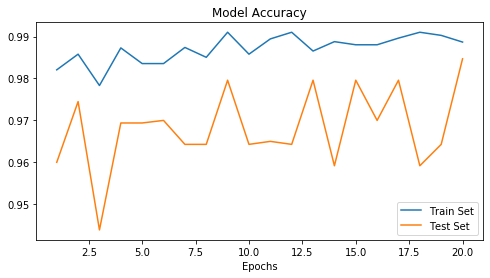

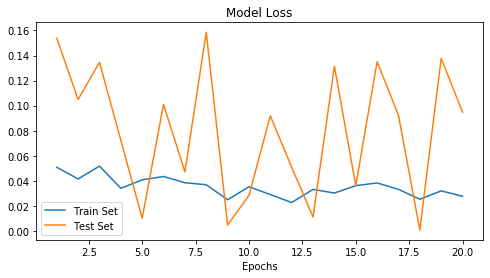

In [117]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, epochs + 1)

plt.figure(figsize=(8,4))
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Test Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.title('Model Accuracy')
plt.show()

plt.figure(figsize=(8,4))
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Test Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.title('Model Loss')
plt.show()

In [118]:
# Evaluate the model to get the corresponding Accuracy, Precision, and Recall

Y_pred = model.predict_generator(test_datagen,test_steps+1)
y_pred = np.argmax(Y_pred,axis=1)

CM =confusion_matrix(test_datagen.classes,y_pred)
print("Confusion Matrix :")
print(CM)

pneumonia_precision= CM[1][1] / (CM[1][0]+CM[1][1])
print("pnuemonia_precision:", pneumonia_precision)

pnuemonia_recall = CM[1][1] / (CM[1][1]+CM[0][1])
print('pnuemonia_recall   :', pnuemonia_recall)

accuracy = (CM[0][0]+CM[1][1])/(CM[0][0]+CM[0][1]+CM[1][0]+CM[1][1])
print('Accuracy           :', accuracy)

target_names = ['Normal', 'COVID19'] 
print(classification_report(test_datagen.classes, y_pred, target_names=target_names))

Confusion Matrix :
[[  0  12]
 [  9 225]]
pnuemonia_precision: 0.9615384615384616
pnuemonia_recall   : 0.9493670886075949
Accuracy           : 0.9146341463414634
              precision    recall  f1-score   support

      Normal       0.00      0.00      0.00        12
     COVID19       0.95      0.96      0.96       234

    accuracy                           0.91       246
   macro avg       0.47      0.48      0.48       246
weighted avg       0.90      0.91      0.91       246

